In [1]:

import numpy as np # matematica
import pandas as ps # ciencias de dados
import matplotlib.pyplot as plt # grafica
import pandas_datareader.data as web # p importar dados do yahoo
import seaborn as sns #Melhorar visualização grafica 
import random

!pip install investpy
import investpy as inv

sns.set()

!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


     |████████████████████████████████| 4.4MB 4.8MB/s 
     |████████████████████████████████| 245kB 37.0MB/s 
     |████████████████████████████████| 5.5MB 35.2MB/s 
  Created wheel for investpy: filename=investpy-0.9.14-cp36-none-any.whl size=4469457 sha256=c815bcce8c601b86bd97f67372f9fe8e2a8a9522e96e4d85bd3863a0486d82ee
  Stored in directory: /root/.cache/pip/wheels/86/35/ee/fc38f22f1353037b5118cff64b62aeed42f63f2c84135eaaaa
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-nr87gr_q
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-nr87gr_q
     |████████████████████████████████| 51kB 2.1MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp36-none-any.whl size=75764 sha256=269799c8a062684bf23c2f4116ea039a6cc7a12c8590a54188e4f31770f4737d
  Stored in directory: /tmp/pip-

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


#Fazendo O ranking

In [ ]:
#LEMBRE, o caminho do arquivo pode mudar de acordo com aonde vc esta executando
roic = ps.read_excel("/content/drive/My Drive/Colab Notebooks/Base de dados ACOES.xlsx", decimal=',',thousands='.')
evebit = ps.read_excel("/content/drive/My Drive/Colab Notebooks/Base de dados ACOES.xlsx", decimal=',',thousands='.',sheet_name="EvEbit")
#roic
#evebit

In [ ]:
anos= [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
rankingROIC = ps.DataFrame()
rankingEVEBIT = ps.DataFrame()
rankingEVEBIT['posicao'] = range(1,144)
rankingROIC['posicao'] = range(1,144)
for data in anos:
    #rankingEVEBIT[data] = evebit[evebit[data] > 0].sort_values(by=[data])['Papel'].values #VALOR DA FIRMA(VALOR DE MERCADO+DIVIDA LIQUIDA)/LUCRO ANTES DE....
    #[evebit.loc[0:143, data]>0]
    rankingEVEBIT[data] = evebit.sort_values(by=[data])['Papel'].values #VALOR DA FIRMA(VALOR DE MERCADO+DIVIDA LIQUIDA)/LUCRO ANTES DE....
    rankingROIC[data] = roic.sort_values(by=[data], ascending=False)['Papel'].values 
rankingROIC
rankingEVEBIT

,posicao,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,ITSA4,ITSA4,GFSA3,CLSC4,SMLS3,TRPL4,BRKM5,SMLS3,SMLS3,SMLS3
1,2,CSNA3,BRML3,CIEL3,CIEL3,BRKM5,SMLS3,SMLS3,ENAT3,SULA11,MTRE3
2,3,LPSB3,CIEL3,LPSB3,CMIG3,CIEL3,UNIP6,CIEL3,UNIP6,WIZS3,WIZS3
3,4,VLID3,HGTX3,CMIG3,CMIG4,BRFS3,CIEL3,ENAT3,BRKM5,ALUP11,GOLL4
4,5,CIEL3,VLID3,CMIG4,BRFS3,ENBR3,ELET3,FESA4,FESA4,GOLL4,ALUP11
...,...,...,...,...,...,...,...,...,...,...,...
138,139,CCPR3,ENEV3,ENEV3,ENEV3,BRDT3,USIM3,KLBN3,GFSA3,MTRE3,CCPR3
139,140,ENEV3,BRDT3,BRDT3,BRDT3,ELET3,CCPR3,TESA3,KLBN3,KLBN3,TESA3
140,141,BRDT3,ELET3,ELET3,ELET3,ELET6,BRDT3,LOGN3,TESA3,KEPL3,AMAR3
141,142,MOVI3,KLBN3,NEOE3,MOVI3,KLBN3,TESA3,TASA4,CCPR3,CAMB3,KLBN3


In [ ]:
ranking = ps.DataFrame()
for data in anos:
    a = rankingEVEBIT.pivot_table(columns=data,values='posicao')
    b = rankingROIC.pivot_table(columns=data,values='posicao')
    c = ps.concat([a,b])
    rank_temporario = c.sum()
    t=c.sum()
    rank_temporario = rank_temporario.sort_values()
    ranking[data] = rank_temporario.index

In [ ]:
#ranking.to_excel('ClassificacaoDpsPython.xlsx')
ranking

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,CIEL3,HGTX3,CIEL3,CIEL3,SMLS3,TRPL4,SMLS3,SMLS3,SMLS3,SMLS3
1,HGTX3,CIEL3,HGTX3,HGTX3,BRKM5,SMLS3,WIZS3,UNIP6,WIZS3,WIZS3
2,VALE3,BRML3,UNIP6,AGRO3,CIEL3,UNIP6,VULC3,ENAT3,GOLL4,GOLL4
3,VLID3,VLID3,CMIG3,CMIG4,UGPA3,CIEL3,BRKM5,WIZS3,ALUP11,BEEF3
4,CSAN3,AMAR3,CMIG4,CMIG3,ABEV3,CCRO3,CIEL3,BRKM5,TGMA3,TGMA3
...,...,...,...,...,...,...,...,...,...,...
138,MTRE3,USIM3,BRDT3,LPSB3,LPSB3,GOAU4,TESA3,DIRR3,KLBN3,BRKM5
139,CCPR3,BRDT3,AGRO3,BRDT3,USIM5,USIM3,LOGG3,EVEN3,KEPL3,CCPR3
140,VULC3,CLSC4,LOGG3,ELET3,USIM3,LOGG3,BRML3,TESA3,MTRE3,AMAR3
141,CLSC4,ENEV3,ENEV3,TASA4,ELET6,LPSB3,TASA4,BRFS3,VVAR3,VVAR3


#Rodando o BackTesting

In [ ]:
dados = ps.DataFrame()
#dados_total
carteira_total = ps.DataFrame()

anos        = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
data_inicio = ['01/01/2011','01/01/2012','01/01/2013','01/01/2014','01/01/2015','01/01/2016','01/01/2017','01/01/2018','01/01/2019','01/01/2020']
data_fim    = ['01/01/2012','01/01/2013','01/01/2014','01/01/2015','01/01/2016','01/01/2017','01/01/2018','01/01/2019','01/01/2020','30/06/2020']

valor_investido=10000

x=0#importante para o for
for data in anos:
  i=1
  dados = ps.DataFrame()
  for ativo in ranking[data][:10]:
    dados[i] = inv.get_stock_historical_data(ativo,country='brazil', from_date=data_inicio[x], to_date=data_fim[x])['Close']
    i=i+1
  
  retorno = dados.pct_change() # retorno diario de todos
  retorno_acumulado = (1 + retorno).cumprod()#fazendo produtorio
  retorno_acumulado.iloc[0] = 1# so para ajustar primeira linha da tabela, tirar o NaN
  
  carteira = valor_investido * retorno_acumulado # seria o retorno acumulado se fosse investido R$10.000
  carteira["saldo"] = carteira.sum(axis=1)
  carteira["retorno"] = carteira["saldo"].pct_change()

  ram = len(carteira)-1
  valor_investido = carteira["saldo"].iloc[ram] /5 #pegando o saldo final do ano e colocando 1/5 em cada nova acao do ano
  
  carteira_total = ps.concat([carteira_total,carteira])
  x=x+1  



In [ ]:
ibov = inv.get_index_historical_data('Bovespa',country='brazil',from_date=data_inicio[0],to_date=data_fim[9])['Close']

ret = ps.DataFrame()
ret['ibov'] = ibov.pct_change() # retorno diario de todos
ret_acumulado = 50000*(1 + ret).cumprod()#fazendo produtorio
ret_acumulado.iloc[0] = 1# so para ajustar primeira linha da tabela, tirar o NaN

carteira_total['ibov_acumulado']=ret_acumulado
carteira_total['ibov_retorno']=ret


In [ ]:
ibov

NameError: ignored

In [ ]:
carteira_total = carteira_total.dropna()

In [ ]:
carteira_total#.to_excel('Olhar.xlsx')

,1,2,3,4,5,6,7,8,9,10,saldo,retorno,ibov_acumulado,ibov_retorno
Date,,,,,,,,,,,,,,
2011-01-04,9.762931e+03,9.494528e+03,1.020678e+04,1.012146e+04,1.017803e+04,1.027620e+04,1.016129e+04,1.011029e+04,9.936766e+03,1.000000e+04,1.002483e+05,0.002483,50254.043891,0.005081
2011-01-05,9.719828e+03,9.499739e+03,1.039249e+04,1.012146e+04,1.015530e+04,1.053209e+04,1.027778e+04,1.029412e+04,9.701897e+03,9.958506e+03,1.006532e+05,0.004039,50806.655640,0.010996
2011-01-06,9.633621e+03,9.343408e+03,1.025847e+04,1.024291e+04,1.000000e+04,1.057677e+04,1.025090e+04,9.963235e+03,9.390244e+03,9.917012e+03,9.957657e+04,-0.010697,50440.601455,-0.007205
2011-01-07,9.547414e+03,9.359041e+03,1.018189e+04,1.024291e+04,1.000000e+04,1.064175e+04,1.014337e+04,9.963235e+03,9.390244e+03,9.709544e+03,9.917940e+04,-0.003989,50067.807929,-0.007391
2011-01-10,9.676724e+03,9.770714e+03,1.016274e+04,1.029960e+04,1.012500e+04,1.062957e+04,1.021505e+04,1.011029e+04,9.259259e+03,9.751037e+03,9.999999e+04,0.008274,50117.720510,0.000997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.922144e+07,3.950241e+07,2.457318e+07,5.238651e+07,3.059118e+07,4.161633e+07,6.426245e+07,4.799005e+07,4.699692e+07,4.691865e+07,4.140591e+08,-0.016765,67448.706675,-0.016648
2020-06-25,1.912127e+07,3.890917e+07,2.579914e+07,5.158976e+07,3.021623e+07,4.214069e+07,6.326690e+07,4.745368e+07,4.960008e+07,4.596412e+07,4.140610e+08,0.000005,68596.274395,0.017014
2020-06-26,1.821967e+07,3.758312e+07,2.469442e+07,5.095236e+07,3.021623e+07,4.182607e+07,6.247047e+07,4.544230e+07,4.821453e+07,4.427534e+07,4.038945e+08,-0.024553,67060.733549,-0.022385


Start date,2011-01-04
End date,2020-06-30
Total months,94
,Backtest
Annual return,32.183%
Cumulative returns,805.542%
Annual volatility,26.084%
Sharpe ratio,1.20
Calmar ratio,0.60
Stability,0.98
Max drawdown,-53.981%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,53.98,2020-01-23,2020-03-18,NaT,NaN
1,19.40,2016-10-25,2016-12-15,2017-02-17,84
2,19.01,2014-09-05,2014-12-16,2015-04-23,165
3,18.91,2011-05-31,2011-08-08,2011-10-26,107
4,12.75,2018-08-03,2018-10-15,2019-02-01,131


Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.24%,-6.47%,5.05%
Fukushima,0.15%,-1.32%,1.38%
EZB IR Event,0.13%,-1.24%,1.33%
Oct14,-0.04%,-2.55%,3.35%
Fall2015,-0.15%,-2.54%,2.82%
Recovery,0.12%,-6.47%,5.05%
New Normal,0.13%,-18.02%,12.63%


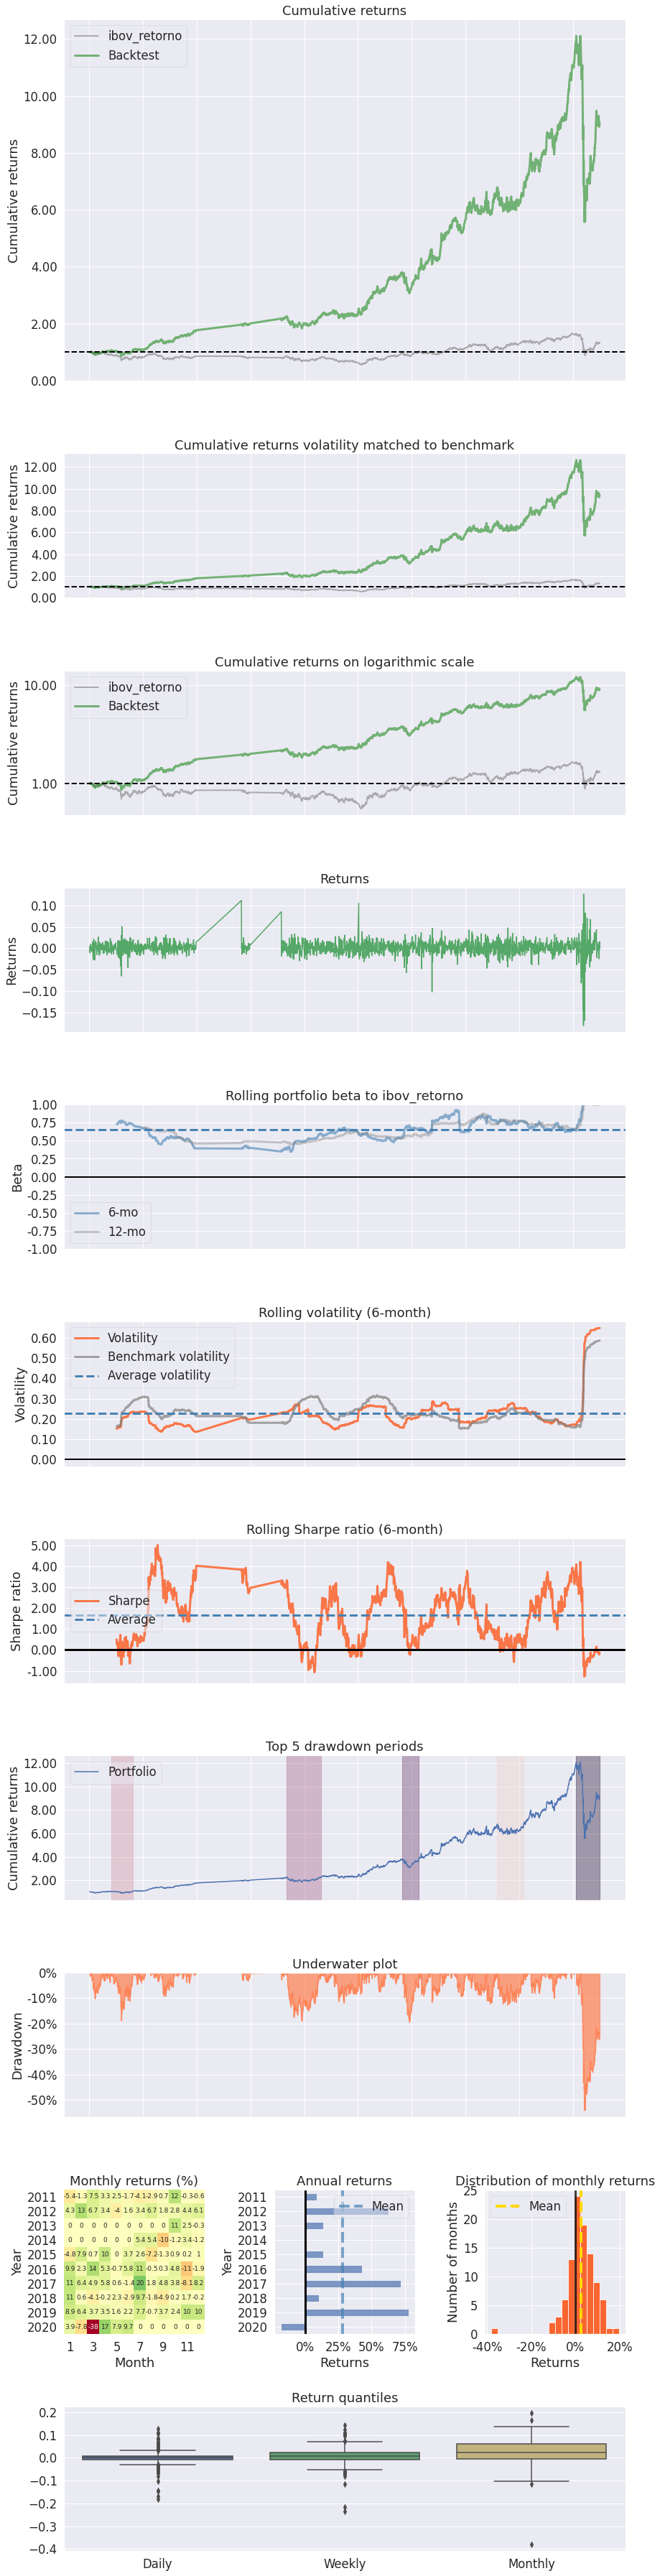

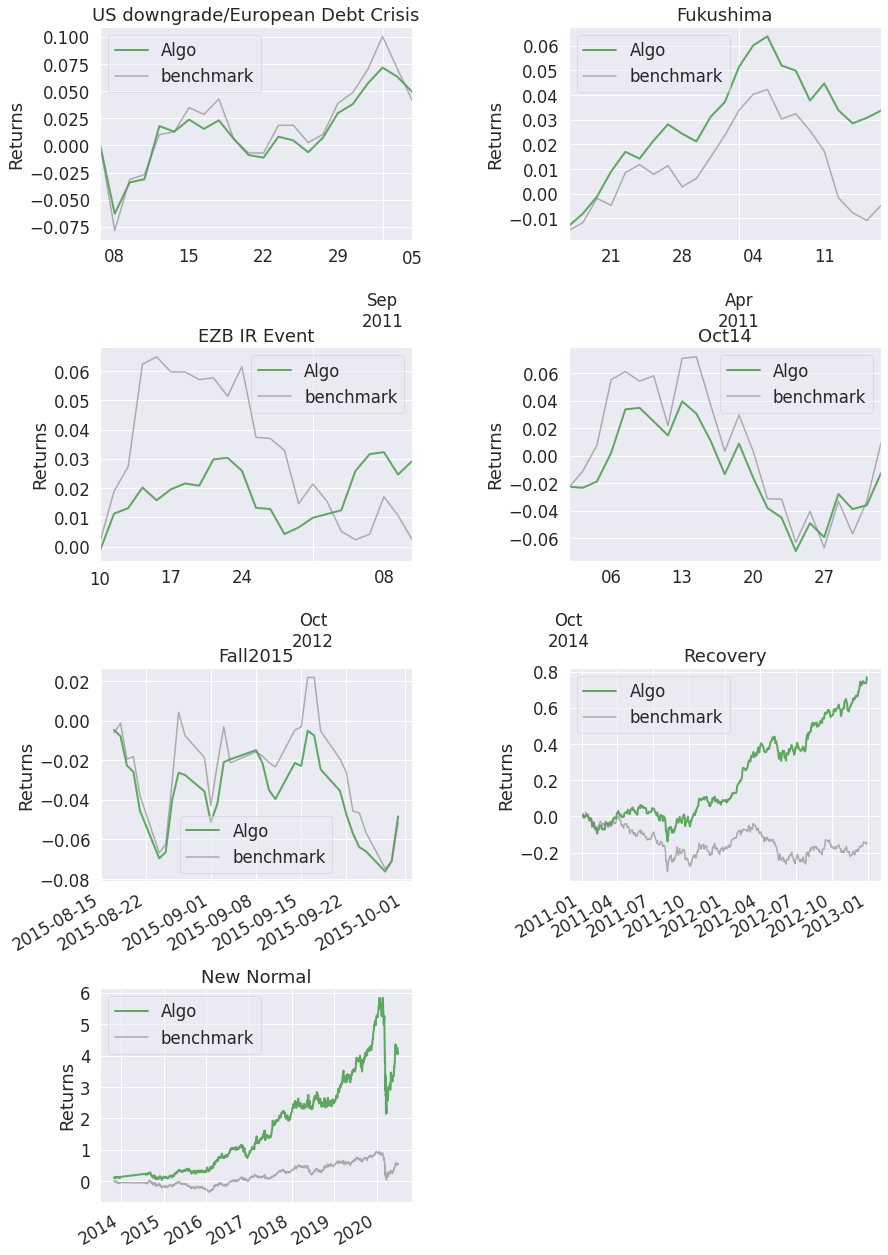

In [ ]:
pf.create_full_tear_sheet(carteira_total["retorno"], benchmark_rets=carteira_total["ibov_retorno"])#ret['ibov'])